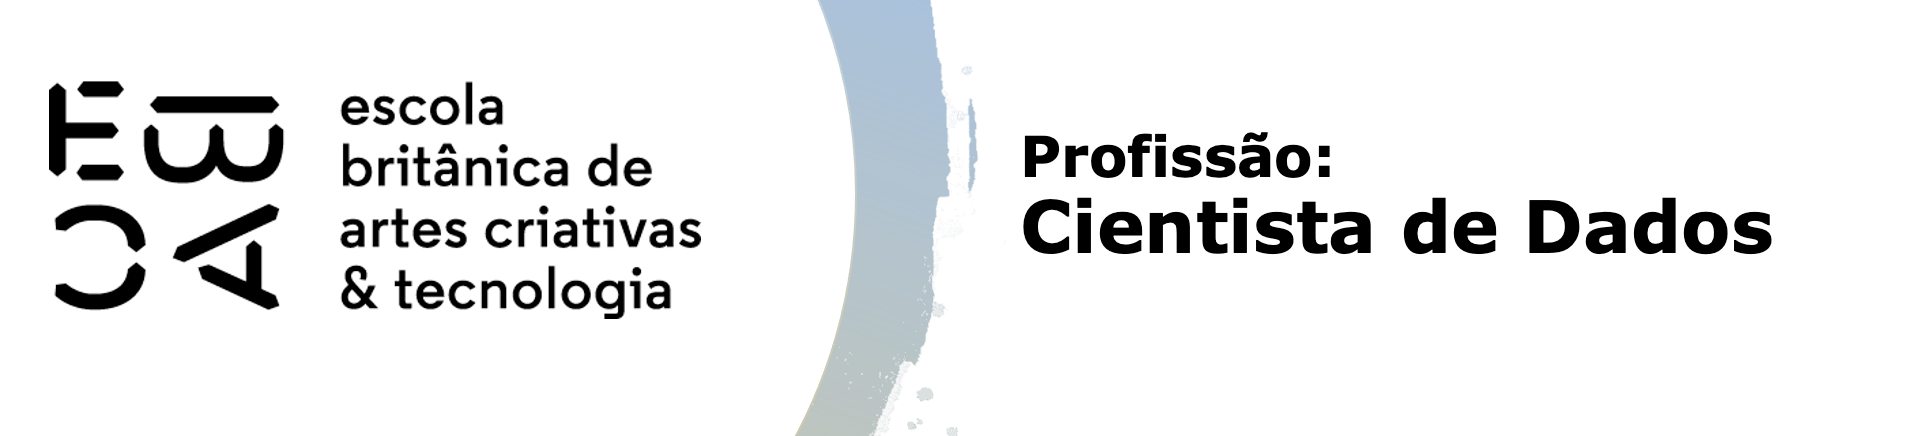

# Tarefa

In [19]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

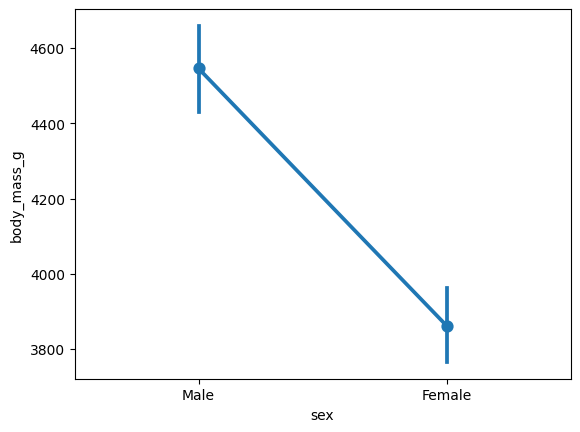

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

Para descobrir se há uma diferença significativa de peso entre machos e fêmeas na população de pinguis, vamos conduzir um teste de hipóteses:

$$H_0: \mu_m =\mu_f$$
$$H_a: \mu_m \neq \mu_f$$

In [60]:
# Número de amostras de cada grupo
n_male = len(pg.groupby('sex')['body_mass_g'].apply(list)['Male'])
n_female = len(pg.groupby('sex')['body_mass_g'].apply(list)['Female'])

# Variância amostral de cada grupo
var_male = pg.groupby('sex')['body_mass_g'].var()['Male']
var_female = pg.groupby('sex')['body_mass_g'].var()['Female']

# Média de cada grupo
mean_male = pg.groupby('sex')['body_mass_g'].mean()['Male']
mean_female = pg.groupby('sex')['body_mass_g'].mean()['Female']

# Graus de liberdade
df = n_male + n_female - 2

# Diferença das médias
dif = mean_male - mean_female

# Variância combinada das amostras
combined_var = ((n_male - 1)*var_male + (n_female - 1)*var_female) / df

# Erro Padrão
stde = (combined_var * (1/n_male + 1/n_female))**0.5

# Estatística t
t = dif / stde 

# Região Crítica (bilateral)
alpha = 0.05
RC = st.t.ppf(1 - alpha/2, df)

# p-value (bilateral)
p_value = 2 * (1 - st.t.cdf(abs(t), df))

# Exibir os resultados
print(f'Diferença: {dif:.2f}')
print(f'Erro Padrão: {stde:.2f}')
print(f'Estatística do Teste: {t:.2f}')
print(f'Região Crítica: {RC:.2f} ou mais')
print(f'p-value: {p_value}')

Diferença: 683.41
Erro Padrão: 80.01
Estatística do Teste: 8.54
Região Crítica: 1.97 ou mais
p-value: 4.440892098500626e-16


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores nas regiões críticas é de 5,00%


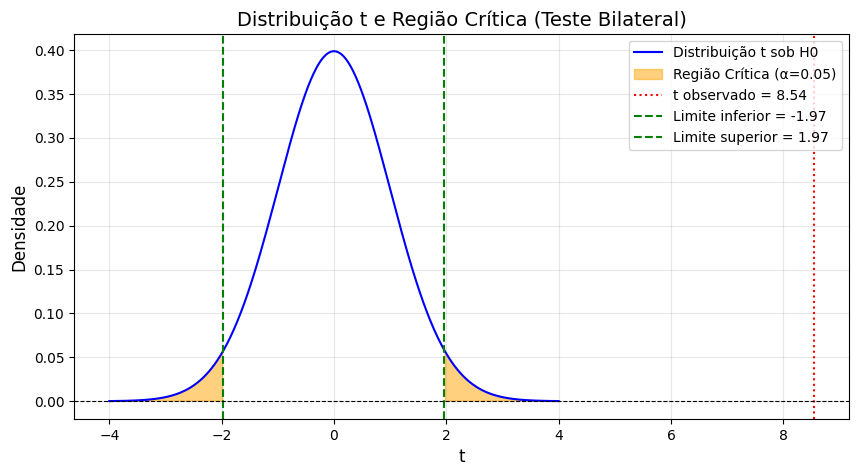

In [58]:
# Parâmetros da densidade sob H0
mu = 0  
variance = 1  
sigma = variance**0.5

# Valores para plotar a densidade
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
y = st.t.pdf(x, df)

# Limites da região crítica bilateral
low_left = st.t.ppf(alpha / 2, df)  
low_right = st.t.ppf(1 - alpha / 2, df)  

# Visualização
fig, ax = plt.subplots(figsize=(10, 5))

# Plot da densidade t
ax.plot(x, y, label='Distribuição t sob H0', color='blue')

# Sombreamento da região crítica bilateral
ax.fill_between(x, y, where=(x < low_left) | (x > low_right), 
                color='orange', alpha=0.5, label='Região Crítica (α=0.05)')

# Linha indicando o valor de t observado
ax.axvline(x=t, color='red', linestyle='dotted', label=f't observado = {t:.2f}')

# Linhas indicando os limites da região crítica
ax.axvline(x=low_left, color='green', linestyle='--', label=f'Limite inferior = {low_left:.2f}')
ax.axvline(x=low_right, color='green', linestyle='--', label=f'Limite superior = {low_right:.2f}')

# Personalização do gráfico
ax.axhline(0, color='black', linewidth=0.8, linestyle='--') 
ax.set_title('Distribuição t e Região Crítica (Teste Bilateral)', fontsize=14)
ax.set_xlabel('t', fontsize=12)
ax.set_ylabel('Densidade', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)

# Cálculo da probabilidade de estar na região crítica
prob_area = (st.t.cdf(low_left, df) + (1 - st.t.cdf(low_right, df)))
print(f'A probabilidade para valores nas regiões críticas é de {prob_area:.2%}'.replace('.', ','))

# Mostrar o gráfico
plt.show()

### Conclusão
Dados os valores obtidos acima e o gráfico observado, temos o p-value sendo muito menor que 0.05 e a estatística t estando muito além da região crítica, com isso nós podemos **rejeitar a hipótese nula**. Ou seja, há evidências estatísticas fortes para concluir que as médias dos dois grupos (masculino e feminino) são significativamente diferentes.

Portanto, a conclusão do teste de hipóteses é que as médias de peso entre os grupos masculino e feminino são significativamente diferentes.

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [87]:
adelie = pg.loc[pg['species'] == 'Adelie'].groupby('sex')['body_mass_g']
gentoo = pg.loc[pg['species'] == 'Gentoo'].groupby('sex')['body_mass_g']
chinstrap = pg.loc[pg['species'] == 'Chinstrap'].groupby('sex')['body_mass_g']

def calcular_p_value(group):
    n1 = len(group.apply(list)['Male'])
    n2 = len(group.apply(list)['Female'])
    var1 = group.var()['Male']
    var2 = group.var()['Female']
    mean1 = group.mean()['Male']
    mean2 = group.mean()['Female']
    
    df = n1 + n2 - 2
    dif = mean1 - mean2
    combined_var = ((n1 - 1)*var1 + (n2 - 1)*var2) / df
    stde = (combined_var * (1/n1 + 1/n2))**0.5
    t = dif / stde 
    p_value = 2 * (1 - st.t.cdf(abs(t), df))
    
    print(f'p-value: {p_value}')

print('O p-value da espécie Adelie é:')
calcular_p_value(adelie)
print()
print('O p-value da espécie Gentoo é:')
calcular_p_value(gentoo)
print()
print('O p-value da espécie Chinstrap é:')
calcular_p_value(chinstrap)

O p-value da espécie Adelie é:
p-value: 0.0

O p-value da espécie Gentoo é:
p-value: 0.0

O p-value da espécie Chinstrap é:
p-value: 2.043956471409203e-06
